In [139]:
import numpy as np
from scipy import stats, random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import data
from math import exp, log, pi, sqrt, cos, sin
from copy import copy
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [146]:
# univariate and multivariate normal probability density function
univariatepdf = stats.norm.pdf
multivariatepdf = stats.multivariate_normal.pdf

In [147]:
# dimension = dim
dim = 2

In [148]:
# parameters of the probability density function p
numberofgaussians = 20
mixweights = stats.norm.rvs(loc = 5, size = numberofgaussians)
mixweights = mixweights/np.sum(mixweights)
# print("mixweights =", mixweights)
mixmus = [ np.array(stats.norm.rvs(scale = 10, size = 2)) for x in range(numberofgaussians) ]
# print("mixmus =", mixmus)
randommatrices = [ np.array([[np.random.random()+2.0, np.random.random()*0.2],
                             [np.random.random()*0.2, np.random.random()+2.0]]) for x in range(numberofgaussians) ]
mixsigmas = [ np.dot(randommatrices[x],randommatrices[x].transpose()) for x in range(numberofgaussians) ]
# print("mixsigmas =", mixsigmas)

# print(np.min(mixmus), np.max(mixmus))


In [149]:
# # parameters of the probability density function p
# mixmus = [
#     np.array([5.443438, 3.097593]),
#     np.array([-5.592092, -2.150316])
# ]
# mixsigmas = [
#     np.array([[6.761966, 1.400297], [1.400297, 7.058602]]),
#     np.array([[5.6483550, 0.4685284], [0.4685284, 9.2519292]])
# ]
# mixweights = [
#     0.465227,
#     0.534773
# ]

In [150]:
# sample according to p
def sample(mixmus, mixsigmas, mixweights, n):
    indexes = np.random.choice(len(mixweights), size=n, p=mixweights)
    A = np.zeros((n, dim))
    for i, ix in enumerate(indexes):
        A[i, :] = stats.multivariate_normal.rvs(mixmus[ix], mixsigmas[ix])
    return A

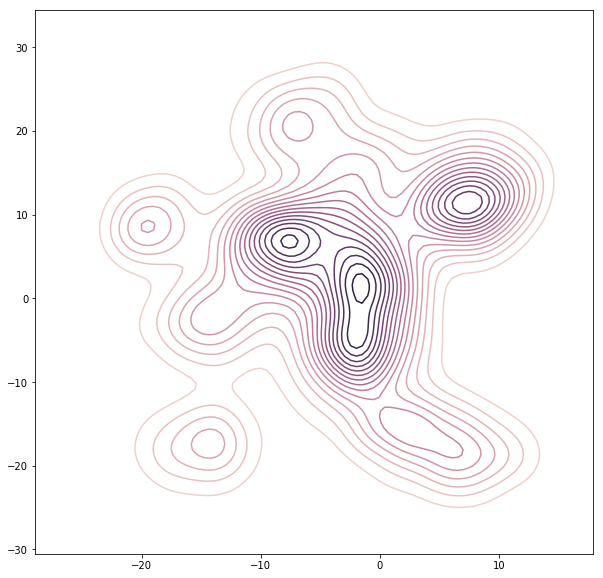

In [152]:
samplepoints = sample(mixmus, mixsigmas, mixweights, 4000)

X1 = samplepoints[:,0]
Y1 = samplepoints[:,1]

fig = plt.figure(figsize = (10, 10))
# create a cubehelix colormap to use with kdeplot
cmap = sns.cubehelix_palette(as_cmap=True)
# plot
sns.kdeplot(X1, Y1, cmap=cmap, shade=False, cut=2, n_levels=20)
plt.savefig("plot-simulation-kde.png", dpi = 100, bbox_inches ="tight")
plt.show()


In [153]:
# function f
def f(x):
    cov = np.eye(dim)
    mu = np.array([8,5])
    cov = np.eye(dim) * 10
    a = (np.sqrt(2*pi))**(dim) * multivariatepdf(x.ravel(), mu.ravel(), cov)
    mu = np.array([-5,8])
    cov = np.eye(dim) * 10
    b = (np.sqrt(2*pi))**(dim) * multivariatepdf(x.ravel(), mu.ravel(), cov)
    mu = np.array([-8, -8])
    cov = np.eye(dim) * 10
    c = (np.sqrt(2*pi))**(dim) * multivariatepdf(x.ravel(), mu.ravel(), cov)
    # a1 = np.array([cos(s/1000) for s in x.ravel()])
    # a2 = np.array([sin(s/1000) for s in x.ravel()]).transpose()
    return( 100 * (a * 1.2 + b * 0.8 + c) )

In [154]:
# example, draw 10 points according to p
X = sample(mixmus = mixmus, mixsigmas = mixsigmas, mixweights = mixweights, n = 10)
for i in range(X.shape[0]):
    print(X[i,:], f(X[i,:]))
    

[-8.88927982  5.64537656] 2.8468481013854237
[-0.5699141   2.66224099] 0.9557646864173189
[-22.62061207   8.30045696] 1.4425446906742211e-06
[-0.84487826 10.80616935] 2.3205929957287177
[  6.10288754 -18.97471767] 1.1633517261839027e-06
[-3.66966785 -6.26562852] 3.36922834996016
[-1.35489796 -9.96364567] 0.9065795965320667
[  3.02635341 -17.58203668] 0.00023236303352676353
[ 8.80339178 13.59411868] 0.2894167381910788
[-7.5687781  -5.10679158] 6.520290560945679


In [159]:
number = 80

# samplepoints = sample(mixmus, mixsigmas, mixweights, number)

x = np.linspace(num = number, start = np.min(samplepoints[:,0]-3), stop = np.max(samplepoints[:,0]+3))
y = np.linspace(num = number, start = np.min(samplepoints[:,1]-3), stop = np.max(samplepoints[:,1]+3))

X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
s = 0
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        s += 1
        print("{0} / {1}".format(s, number*number), end = '\r')
        x = X[i][j]
        y = Y[i][j]
        Z[i][j] = f(np.array([x, y]))


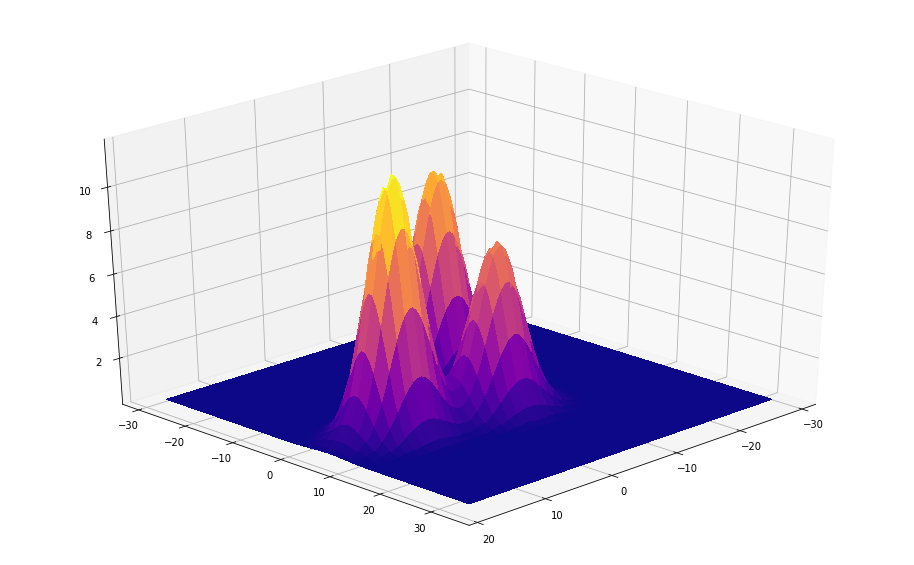

In [160]:
fig = plt.figure(figsize = (16, 10))
ax = fig.gca(projection = "3d")

plt.title(" ")
surf = ax.plot_surface(X, Y, Z, cmap = cm.plasma, linewidth = 0, antialiased = False)
# fig.colorbar(surf, shrink=0.5, aspect=10)
ax.view_init(azim=45, elev=30)
plt.savefig("plot-simulation-3d-function.png", dpi = 100, bbox_inches ="tight")

plt.show()

### Monte Carlo integration

In [161]:
n = 1000 # number of points to draw at each iteration
m = 1 # number of iterations
I = []
for i in range(m):
    A = 0
    for j in range(n):
        weight = 1/n
        point = sample(mixmus, mixsigmas, mixweights, n = 1)
        A += weight*f(point)
    I.append(A)
print("Monte Carlo integration : ", sum(I)/len(I))

Monte Carlo integration :  1.482085357182698


### Frank-Wolfe Bayesian Quadrature integration

In [203]:
n = 50 # number of points to draw
lambda_ = 1
sigma_ = 2

In [204]:
# reproducing kernel k (RKHS)
def kernel(a, b, lambda_, sigma_):
    cov = sigma_**2 * np.eye(dim)
    return( lambda_ * lambda_ * (np.sqrt(2*pi)*sigma_)**(dim) * multivariatepdf(a.ravel(), b.ravel(), cov) )

In [205]:
# one-dimensional mean map kernel
def simplemeanmapkernel(x, mu, sigma, lambda_, sigma_):
    cov = sigma_**2 * np.eye(dim)
    # np.linalg.det(sigma) = sigma
    # np.linalg.inv(sigma) = sigma
    return( lambda_ * lambda_ * (np.sqrt(2*pi)*sigma_)**(dim) * multivariatepdf(x.ravel(), mu.ravel(), sigma + cov) )
# two-dimensional mean map kernel
def mixturemeanmapkernel(x, mus, sigmas, mixweights, lambda_, sigma_):
    mixture = np.array([simplemeanmapkernel(x, mu1, sigma1, lambda_, sigma_) for mu1, sigma1 in zip(mus, sigmas)])
    return np.sum(mixweights * mixture)

In [206]:
# canonical feature map for a given x
def phi(x, lambda_, sigma_):
    def atom(a):
        return(kernel(a, x, lambda_, sigma_))
    return(atom)
# function to compute the successive g
def psi(rho, a, b):
    def g(x):
        return((1-rho) * a(x) + rho * b(x))
    return(g)

In [207]:
# define the model

# model = "FWBQ"
model = "FWLSBQ"

In [208]:
# start for rho, line-search
if model == "FWLSBQ":
    rho = [1/(i+1) for i in range(0, 1)]
    print("model is FWLSBQ")
elif model == "FWBQ":
    rho = [1/(i+1) for i in range(0, n)]
    print("model is FWBQ")
else:
    print("model has to be either FWLSBQ or FWBQ")

model is FWLSBQ


In [209]:
meanmapkernel = lambda x: mixturemeanmapkernel(x, mixmus, mixsigmas, mixweights, lambda_, sigma_)

In [210]:
# integral of the mean map kernel
def integralmeanmapkernel(mixmus, mixsigmas, mixweights, lambda_, sigma_):
    cov = sigma_**2 * np.eye(dim)
    L = len(mixweights)
    c = lambda_ * lambda_ * (np.sqrt(2*pi)*sigma_)**(dim)
    a = 0
    for i in range(L):
        for j in range(L):
            a = a + mixweights[i] * mixweights[j] * multivariatepdf(x = mixmus[i].ravel(), mean = mixmus[j].ravel(), cov = mixsigmas[i] + mixsigmas[j] + cov)
    return(c * a)

In [211]:
# step 1 // FW (Frank-Wolfe) algorithm

# store information in a dictionary
dico = {} # dictionnary to store at each iteration : point(i), weight(i), g(i)
i = 1
print("{0} / {1}".format(i, n), end = '\r')
W = [np.nan]
for l in range(1, i+1):
    w = 1
    for j in range(l+1, i+1):
        w = w * (1-rho[j-1])
    w = w * rho[l-1]
    W.append(w)
X = sample(mixmus, mixsigmas, mixweights, n = 1) # draw the first point randomly
dico[i] = {"point" : X[0], "weight" : W}
dico[i]["function"] = phi(dico[i]["point"], lambda_, sigma_)
g = phi(dico[i]["point"], lambda_, sigma_)
dico[i]["g"] = g

for i in range(2, n+1):

    print("{0} / {1}".format(i, n), end = '\r')

    # step1 ) computing a new point

    # T is the function to minimize
    def T(x, i, kernel, meanmapkernel):
        s = 0
        for j in range(1, i):
            w = dico[i-1]["weight"][j]
            c = dico[j]["point"]
            s = s + ( w * kernel(x, c, lambda_, sigma_) )
        s = s - meanmapkernel(x)
        return(s)

    # samplepoints to find the minimum among them
    if i == 2:
        samplepoints1 = sample(mixmus, mixsigmas, mixweights, n = 500)

    # start = clock()
    # find the minimum X
    Xmin = samplepoints1[0]
    Tmin = T(x = Xmin, i = i, kernel = kernel, meanmapkernel = meanmapkernel)
    for X in samplepoints1:
        t = T(x = X, i = i, kernel = kernel, meanmapkernel = meanmapkernel)
        if t < Tmin:
            Xmin = X
            Tmin = t
    X = Xmin
    # X = samplepoints1[np.argmin([T(x, i, kernel, meanmapkernel) for x in samplepoints1])]
    # end = clock()
    # print(end - start, "\n")

    # step 2 ) computing the weights for the next iteration

    if model == "FWLSBQ":
        # compute the matrix K
        K = np.zeros(shape = (i-1, i-1))
        for c in range(i-1):
            for d in range(i-1):
                Xc = dico[c+1]["point"]
                Xd = dico[d+1]["point"]
                K[c][d] = kernel(Xc, Xd, lambda_, sigma_)

        first = np.dot(np.dot([W[1:]], K), W[1:])
        second = 0
        weightedmeanmap = 0
        for r in range(1, i-1+1):
            point = dico[r]["point"] # point
            weight = W[r] # weight
            second += weight * kernel(point, X, lambda_, sigma_)
            weightedmeanmap += weight * meanmapkernel(point)
        numerator = first - second - weightedmeanmap + meanmapkernel(X)
        denominator = first - 2 * second + kernel(X, X, lambda_, sigma_)
        rho.append(float(numerator / denominator))

    W = [np.nan]
    for l in range(1, i+1):
        w = 1
        for j in range(l+1, i+1):
            w = w * (1-rho[j-1])
        w = w * rho[l-1]
        W.append(w)

    dico[i] = {"point" : X, "weight" : W}
    dico[i]["function"] = phi(dico[i]["point"], lambda_, sigma_)

    # step 3 ) computing the mean element
    g = psi(rho = rho[-1], a = g, b = dico[i]["function"])
    dico[i]["g"] = g


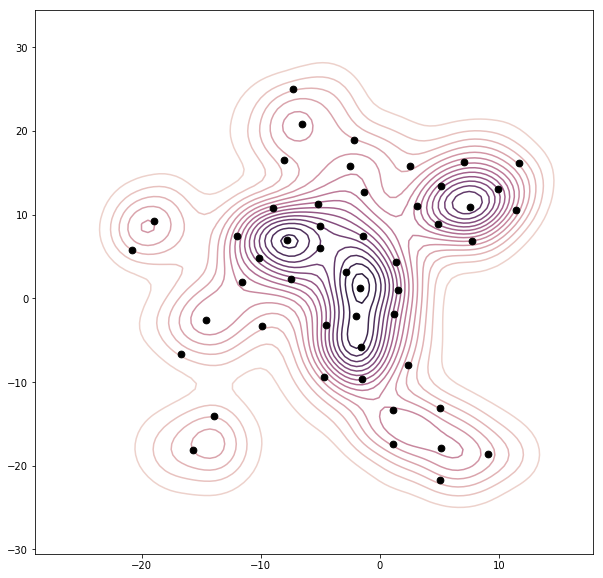

In [212]:
# plot the selected points and the distribution of the probability p

selectedpoints = np.matrix(data = np.zeros(n*dim).reshape(n, dim))

i = 0
for x in dico.items():
    selectedpoints[i,:] = x[1]["point"]
    i = i+1

selectedpoints = np.array(selectedpoints)

plt.figure(figsize=(10, 10))

# samplepoints = sample(mixmus, mixsigmas, mixweights, 4000)
X1 = samplepoints[:,0]
Y1 = samplepoints[:,1]
plt.rcParams["figure.figsize"] = (10, 6)
# plt.scatter(X1, Y1, color = "orange", s = 6)
# create a cubehelix colormap to use with kdeplot
cmap = sns.cubehelix_palette(as_cmap=True)
# plot
sns.kdeplot(X1, Y1, cmap=cmap, shade=False, cut=2, n_levels=20)
plt.scatter(selectedpoints[:,0], selectedpoints[:,1], color = "black", s=45, zorder=2)

plt.savefig("plot-simulation-selectedpoints-"+model+".png", dpi = 100, bbox_inches ="tight")

plt.show()


calculations for the mean element done !
starting iteration = 5
starting iteration = 20
starting iteration = 50


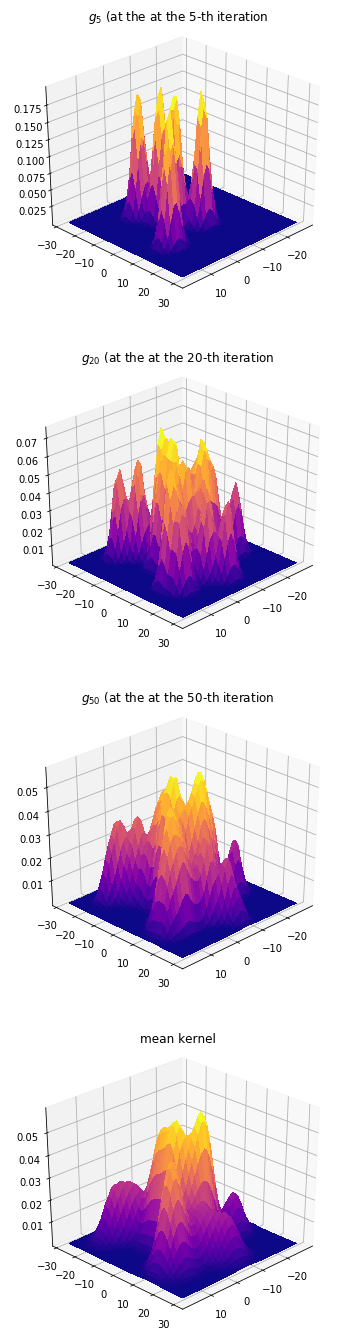

In [213]:
N = 40

fig = plt.figure(figsize=(6, 4*6))

samplepoints2 = sample(mixmus, mixsigmas, mixweights, 4000)

number = N
X = np.linspace(num = number, start = np.min(samplepoints2[:,0])-2, stop = np.max(samplepoints2[:,0])+2)
Y = np.linspace(num = number, start = np.min(samplepoints2[:,1])-2, stop = np.max(samplepoints2[:,1])+2)
# samplepoints = np.array([[a,b] for a, b in zip(x, y)])

MX, MY = np.meshgrid(X, Y)
Z1 = np.zeros(MX.shape)
s = 0
for i in range(Z1.shape[0]):
    for j in range(Z1.shape[1]):
        s += 1
        print("mean element = {0} / {1}".format(s, N*N), end = '\r')
        x = MX[i][j]
        y = MY[i][j]
        Z1[i][j] = meanmapkernel(np.array([x, y]))
print("calculations for the mean element done !")

k = 0
for p in [5, 20, 50]:
    
    print("starting iteration =", p)
    
    k += 1
    ax = fig.add_subplot(4, 1, k, projection='3d')
    Z = np.zeros(MX.shape)
    s = 0
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            s += 1
            print("{0} / {1}".format(s, N*N), end = '\r')
            x = MX[i][j]
            y = MY[i][j]
            g_ = dico[p]["g"]
            Z[i][j] = g_(np.array([x, y]))
    surf = ax.plot_surface(MX, MY, Z, cmap = cm.plasma, linewidth = 0, antialiased = False)
    ax.set_title(r"$g_{"+str(p)+"}$ (at the at the "+str(p)+"-th iteration\n")
    ax.view_init(azim=45, elev=30)

    # samplepoints = sample(mixmus, mixsigmas, mixweights, N)
    # X = sorted(samplepoints[:,0])
    # Y = sorted(samplepoints[:,1])
    
k += 1
ax = fig.add_subplot(4, 1, k, projection='3d')
ax.plot_surface(MX, MY, Z1, cmap = cm.plasma, linewidth = 0, antialiased = False)
ax.set_title("mean kernel\n")
ax.view_init(azim=45, elev=30)

plt.savefig("plot-simulation-3d-meanelement-"+model+".png", dpi = 100, bbox_inches ="tight")

plt.show()


In [214]:
# step 2 // BQ (Bayesian Quadrature) algorithm

# compute the vector Z
Z = np.zeros(shape = (n, 1))
for i in range(n):
    Xi = dico[i+1]["point"]
    Z[i][0] = meanmapkernel(Xi)

# compute the matrix K
K = np.zeros(shape = (n, n))
for i in range(n):
    for j in range(n):
        Xi = dico[i+1]["point"]
        Xj = dico[j+1]["point"]
        K[i][j] = kernel(Xi, Xj, lambda_, sigma_)
# compute the inverse of the matrix K
INVK = np.linalg.inv(K)

# Frank-Wolfe weights
WFW = W[1:]
print("sum of Frank-Wolfe weights = ", sum(WFW))

# Bayesian Quadrature weights
WBQ = np.dot(Z.transpose(), INVK)[0]
print("sum of Bayesian Quadrature weights = ", sum(WBQ))


sum of Frank-Wolfe weights =  0.9999999999999999
sum of Bayesian Quadrature weights =  0.8416945499836574


In [215]:
# step 3 // posterior mean, equation (4) in the article

# compute the vector F
F = np.zeros(shape = (n, 1))
for i in range(n):
    Xi = dico[i+1]["point"]
    F[i][0] = f(Xi)

# compute the posterior mean
mean = np.float(np.dot(np.dot(Z.transpose(), INVK), F))

In [216]:
# step 4 // posterior variance, equation (5) in the article

variance1 = integralmeanmapkernel(mixmus = mixmus, mixsigmas = mixsigmas, mixweights = mixweights, lambda_ = lambda_, sigma_ = sigma_)
variance2 = np.float(np.dot(np.dot(Z.transpose(), INVK), Z))
variance = variance1 - variance2


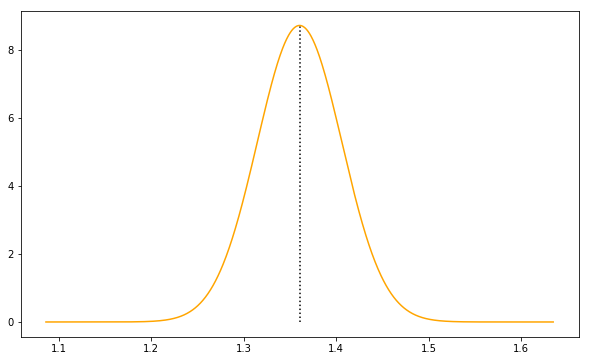

In [217]:
# step 5 // full posterior (normal distribution)

plt.rcParams["figure.figsize"] = (10, 6)
selectedpoints = np.array(selectedpoints)
X_ = np.linspace(start = mean-6*np.sqrt(variance), stop = mean+6*np.sqrt(variance), num = 1000)
Y_ = univariatepdf(x = X_, loc = mean, scale = np.sqrt(variance))
plt.plot(X_, Y_, color = "orange")
plt.vlines(x = mean, ymin = 0, ymax = max(Y_), color = "black", linestyles = "dotted")
plt.show()


In [218]:
# summary

print(" Monte Carlo integration \t \t \t =", float(sum(I)/len(I)), "\n",
"Frank-Wolfe integration \t \t \t =", float(np.float(np.dot(W[1:], F))), "\n",
"Frank-Wolfe Bayesian Quadrature integration \t =", float(mean))


 Monte Carlo integration 	 	 	 = 1.482085357182698 
 Frank-Wolfe integration 	 	 	 = 1.5287778133246448 
 Frank-Wolfe Bayesian Quadrature integration 	 = 1.360432958089961


In [219]:
# compute the vector G
G = np.zeros(shape = (n, n))
for i in range(n):
    print("{0} / {1}".format(i+1, n), end = '\r')
    gi = dico[i+1]["g"]
    for j in range(i+1):
        G[j,i] = gi(dico[j+1]["point"])
print(G[:4,:4])

[[1.         0.48137787 0.31600985 0.23647811]
 [0.         0.51862213 0.34051607 0.25472354]
 [0.         0.         0.34358658 0.25759832]
 [0.         0.         0.         0.25261912]]


In [220]:
information = {}

# print(F.shape)
# print(Z.shape)
# print(K.shape)

start = 5

FWLS_mean = []
FWLSBQ_mean = []
FWLS_variance = []
FWLSBQ_variance = []

index = []
index.append(start)
x = start
while x < n+1:
    index.append(x)
    x += 2
    
I0 = index
    
for i in index:
    print("{0} / {1}".format(i, n), end = '\r')
    Gi = G[0:i,i-1].reshape(i, 1)
    Zi = Z[0:i,:]
    Fi = F[0:i,:]
    Ki = K[0:i,0:i]
    
    WeightsFW = dico[i]["weight"][1:]
    
    WeightsBQ = np.dot(Zi.transpose(), np.linalg.inv(Ki))
    
    MeanFW = np.float(np.dot(WeightsFW, Fi))
    
    MeanBQ = np.float(np.dot(WeightsBQ, Fi))
    
#     variance1 = integralmeanmapkernel(mixmus = mixmus, mixsigmas = mixsigmas, mixweights = mixweights, lambda_ = lambda_, sigma_ = sigma_)
#     variance2 = np.float(np.dot(WeightsFW, Gi))
#     variance = variance1 - variance2
    variance = np.sum(np.square(Gi - Zi))
    VarianceFW = abs(variance)
    
    variance1 = integralmeanmapkernel(mixmus = mixmus, mixsigmas = mixsigmas, mixweights = mixweights, lambda_ = lambda_, sigma_ = sigma_)
    variance2 = np.float(np.dot(WeightsBQ, Zi))
    variance = variance1 - variance2
    VarianceBQ = abs(variance)
    
    FWLS_mean.append(MeanFW)
    FWLSBQ_mean.append(MeanBQ)
    FWLS_variance.append(VarianceFW)
    FWLSBQ_variance.append(VarianceBQ)


In [221]:
model

'FWLSBQ'

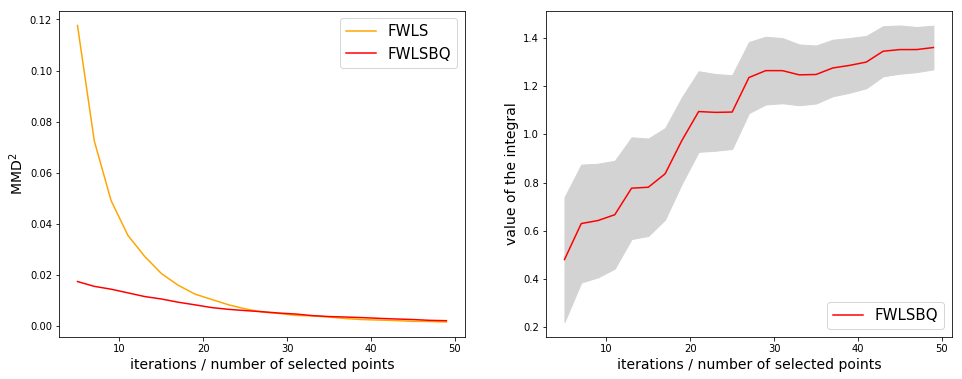

In [222]:
plt.rcParams["figure.figsize"] = (16, 6)

if model == "FWBQ":
    algo1 = "FW"
    algo2 = "FWBQ"
elif model == "FWLSBQ":
    algo1 = "FWLS"
    algo2 = "FWLSBQ"

plt.subplot(1,2,1)
X1 = I0
Y1 = FWLS_variance
Y2 = FWLSBQ_variance

line1, = plt.plot(X1, Y1, color = "orange", label = algo1)
line2, = plt.plot(X1, Y2, color = "red", label = algo2)
plt.xlabel(r"iterations / number of selected points", fontsize = 14)
plt.ylabel(r"MMD$^2$", fontsize = 14)
plt.legend(handles=[line1, line2], fontsize = 15, loc = 'upper right')

plt.subplot(1,2,2)
X0 = I0
Y0 = FWLSBQ_mean
Y01 = FWLSBQ_mean-1.96*np.sqrt(FWLSBQ_variance)
Y02 = FWLSBQ_mean+1.96*np.sqrt(FWLSBQ_variance)
line0, = plt.plot(X0, Y0, color = "red", label = algo2)
plt.fill_between(I0, Y01, Y02, color = "lightgrey")
plt.xlabel(r"iterations / number of selected points", fontsize = 14)
plt.ylabel(r"value of the integral", fontsize = 14)
plt.legend(handles=[line0], fontsize = 15, loc = 'lower right')

plt.savefig("plot-mmdsquared-value-"+model+".png", dpi = 100, bbox_inches ="tight")

plt.show()
